In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib

import matplotlib.pyplot as plt
from scipy.stats import skew
from scipy.stats.stats import pearsonr


%config InlineBackend.figure_format = 'retina' #set 'png' here when working on notebook
%matplotlib inline

In [2]:
train = pd.read_csv("/Users/chunyu/Downloads/kaggle/titanic/train.csv")
test = pd.read_csv("/Users/chunyu/Downloads/kaggle/titanic/test.csv")

In [3]:
train.describe()

,PassengerId,Survived,Pclass,Age,SibSp,Parch,Fare
count,891.000000,891.000000,891.000000,714.000000,891.000000,891.000000,891.000000
mean,446.000000,0.383838,2.308642,29.699118,0.523008,0.381594,32.204208
std,257.353842,0.486592,0.836071,14.526497,1.102743,0.806057,49.693429
min,1.000000,0.000000,1.000000,0.420000,0.000000,0.000000,0.000000
25%,223.500000,0.000000,2.000000,20.125000,0.000000,0.000000,7.910400
50%,446.000000,0.000000,3.000000,28.000000,0.000000,0.000000,14.454200
75%,668.500000,1.000000,3.000000,38.000000,1.000000,0.000000,31.000000
max,891.000000,1.000000,3.000000,80.000000,8.000000,6.000000,512.329200


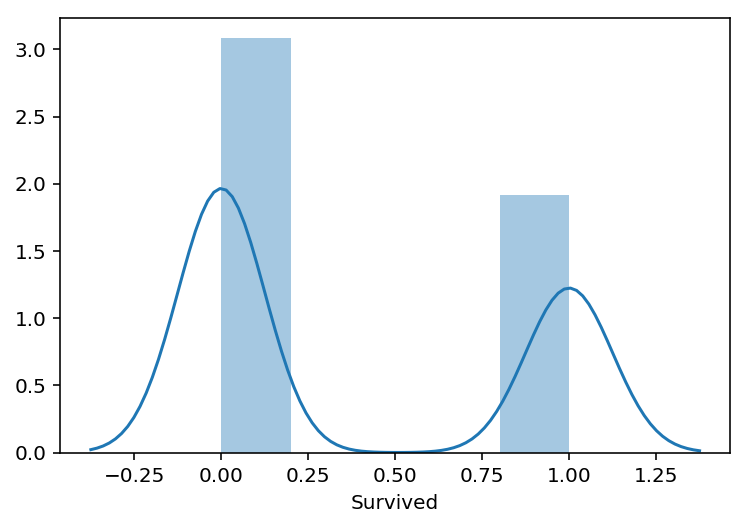

In [4]:
sns.distplot(train['Survived'])

In [5]:
#print train['Age'].value_counts()
print train['SibSp'].value_counts()
print train['Parch'].value_counts()

24.00    30
22.00    27
18.00    26
19.00    25
30.00    25
28.00    25
21.00    24
25.00    23
36.00    22
29.00    20
32.00    18
27.00    18
35.00    18
26.00    18
16.00    17
31.00    17
20.00    15
33.00    15
23.00    15
34.00    15
39.00    14
17.00    13
42.00    13
40.00    13
45.00    12
38.00    11
50.00    10
2.00     10
4.00     10
47.00     9
         ..
71.00     2
59.00     2
63.00     2
0.83      2
30.50     2
70.00     2
57.00     2
0.75      2
13.00     2
10.00     2
64.00     2
40.50     2
32.50     2
45.50     2
20.50     1
24.50     1
0.67      1
14.50     1
0.92      1
74.00     1
34.50     1
80.00     1
12.00     1
36.50     1
53.00     1
55.50     1
70.50     1
66.00     1
23.50     1
0.42      1
Name: Age, Length: 88, dtype: int64
0    608
1    209
2     28
4     18
3     16
8      7
5      5
Name: SibSp, dtype: int64
0    678
1    118
2     80
5      5
3      5
4      4
6      1
Name: Parch, dtype: int64


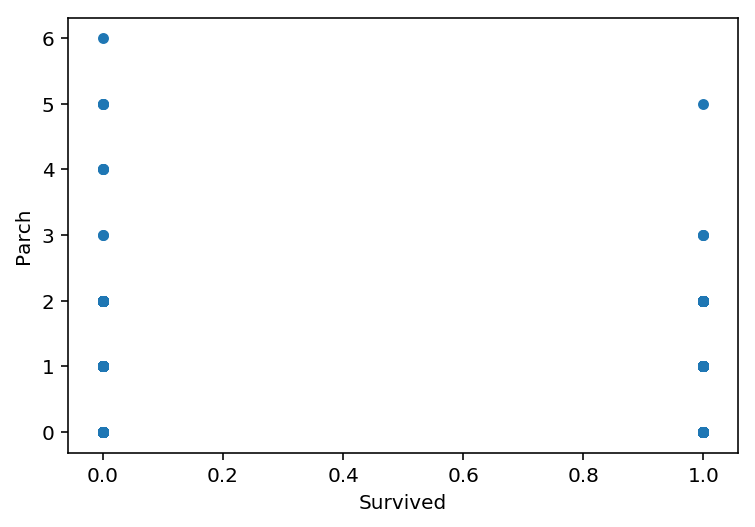

In [6]:
var = "Parch"
data = pd.concat([train['Survived'],train[var]],axis=1)
data.plot.scatter(x="Survived",y=var)

In [7]:
corr = train.corr()
print corr

             PassengerId  Survived    Pclass       Age     SibSp     Parch  \
PassengerId     1.000000 -0.005007 -0.035144  0.036847 -0.057527 -0.001652   
Survived       -0.005007  1.000000 -0.338481 -0.077221 -0.035322  0.081629   
Pclass         -0.035144 -0.338481  1.000000 -0.369226  0.083081  0.018443   
Age             0.036847 -0.077221 -0.369226  1.000000 -0.308247 -0.189119   
SibSp          -0.057527 -0.035322  0.083081 -0.308247  1.000000  0.414838   
Parch          -0.001652  0.081629  0.018443 -0.189119  0.414838  1.000000   
Fare            0.012658  0.257307 -0.549500  0.096067  0.159651  0.216225   

                 Fare  
PassengerId  0.012658  
Survived     0.257307  
Pclass      -0.549500  
Age          0.096067  
SibSp        0.159651  
Parch        0.216225  
Fare         1.000000  


In [8]:
train.isnull().sum()

PassengerId      0
Survived         0
Pclass           0
Name             0
Sex              0
Age            177
SibSp            0
Parch            0
Ticket           0
Fare             0
Cabin          687
Embarked         2
dtype: int64

In [9]:
def preprocess(train,age_mean):
    #train = train.drop('PassengerId',axis=1)
    train = train.drop("Name",axis=1)
    train = train.drop("Cabin",axis=1)
    train = train.drop("Ticket",axis=1)
    train = train.drop("Fare",axis=1)
    train = train.replace({
        "Sex":{"male":0,"female":1},
        "Embarked":{"C":0,"Q":1,"S":2}
    })
    train.loc[:, "Age"] = train.loc[:, "Age"].fillna(age_mean)
    #print "##",train.isnull().sum()
    age_bin = [0,14,64,150]
    age_cats = pd.cut(train.loc[:, "Age"],age_bin)
    #print "###",age_cats.value_counts()
    train.loc[:, "Age"] = age_cats
    #print "##",train.isnull().sum()
    train = train.dropna()
    
    return train

In [10]:
age_mean = train.loc[:, "Age"].mean()
train = preprocess(train,age_mean)
train = train.drop('PassengerId',axis=1)
train_label = train["Survived"]
train = train.drop("Survived",axis=1)

print train.head()
print train_label.head()


   Pclass  Sex       Age  SibSp  Parch  Embarked
0       3    0  (14, 64]      1      0       2.0
1       1    1  (14, 64]      1      0       0.0
2       3    1  (14, 64]      0      0       2.0
3       1    1  (14, 64]      1      0       2.0
4       3    0  (14, 64]      0      0       2.0
0    0
1    1
2    1
3    1
4    0
Name: Survived, dtype: int64


In [11]:
#print train_label.values[:3]
from sklearn import svm
clf = svm.SVC()
train_dummy = pd.get_dummies(train,columns=train.columns)

#train_columns = train_dummy.columns.tolist()
#train_columns.insert(train_columns.index('Parch_6')+1,'Parch_9')
#print "##",train_columns
#train_dummy.reindex(columns=train_columns,fill_value=0)
#print train_dummy.head()
#train_dummy['Parch_9'] = 0
train_dummy.insert(train_dummy.columns.tolist().index("Parch_6")+1,"Parch_9",[0 for x in range(0,train_dummy.shape[0])])
print "train dummy count",train_dummy.count()
print train_dummy.head()
clf.fit(train_dummy, train_label)

train dummy count Pclass_1         889
Pclass_2         889
Pclass_3         889
Sex_0            889
Sex_1            889
Age_(0, 14]      889
Age_(14, 64]     889
Age_(64, 150]    889
SibSp_0          889
SibSp_1          889
SibSp_2          889
SibSp_3          889
SibSp_4          889
SibSp_5          889
SibSp_8          889
Parch_0          889
Parch_1          889
Parch_2          889
Parch_3          889
Parch_4          889
Parch_5          889
Parch_6          889
Parch_9          889
Embarked_0.0     889
Embarked_1.0     889
Embarked_2.0     889
dtype: int64
   Pclass_1  Pclass_2  Pclass_3  Sex_0  Sex_1  Age_(0, 14]  Age_(14, 64]  \
0         0         0         1      1      0            0             1   
1         1         0         0      0      1            0             1   
2         0         0         1      0      1            0             1   
3         1         0         0      0      1            0             1   
4         0         0         1      1     

SVC(C=1.0, cache_size=200, class_weight=None, coef0=0.0,
  decision_function_shape='ovr', degree=3, gamma='auto', kernel='rbf',
  max_iter=-1, probability=False, random_state=None, shrinking=True,
  tol=0.001, verbose=False)

In [12]:
clf.score(train_dummy,train_label)

0.7851518560179978

In [13]:
#print test.isnull().sum()
#print "before process",test.count()
#print "##age_mean",age_mean
test = preprocess(test,age_mean)
test_id = test['PassengerId']
test = test.drop('PassengerId',axis=1)
#print test.head()
print "after process",test.count()
test_dummy = pd.get_dummies(test,columns=test.columns)
print "dummy count",test_dummy.count()
print test_dummy.head()
test_ret = clf.predict(test_dummy)

after process Pclass      418
Sex         418
Age         418
SibSp       418
Parch       418
Embarked    418
dtype: int64
dummy count Pclass_1         418
Pclass_2         418
Pclass_3         418
Sex_0            418
Sex_1            418
Age_(0, 14]      418
Age_(14, 64]     418
Age_(64, 150]    418
SibSp_0          418
SibSp_1          418
SibSp_2          418
SibSp_3          418
SibSp_4          418
SibSp_5          418
SibSp_8          418
Parch_0          418
Parch_1          418
Parch_2          418
Parch_3          418
Parch_4          418
Parch_5          418
Parch_6          418
Parch_9          418
Embarked_0       418
Embarked_1       418
Embarked_2       418
dtype: int64
   Pclass_1  Pclass_2  Pclass_3  Sex_0  Sex_1  Age_(0, 14]  Age_(14, 64]  \
0         0         0         1      1      0            0             1   
1         0         0         1      0      1            0             1   
2         0         1         0      1      0            0             1   
3 

In [14]:
df = pd.DataFrame({"PassengerId":test_id,"Survived":test_ret})
df.head()

,PassengerId,Survived
0,892,0
1,893,1
2,894,0
3,895,0
4,896,1


In [15]:
df.to_csv('/Users/chunyu/Downloads/kaggle/titanic/svm_results_dummy.csv', header=True, index=False)

In [16]:
import xgboost as xgb
gbm = xgb.XGBClassifier(max_depth=3, n_estimators=300, learning_rate=0.05).fit(train_dummy,train_label)
predictions = gbm.predict(test_dummy)
submission = pd.DataFrame({"PassengerId":test_id,"Survived":test_ret})
submission.to_csv("/Users/chunyu/Downloads/kaggle/titanic/xgboost_results_dummy.csv", index=False)

ValueError: feature_names may not contain [, ] or <